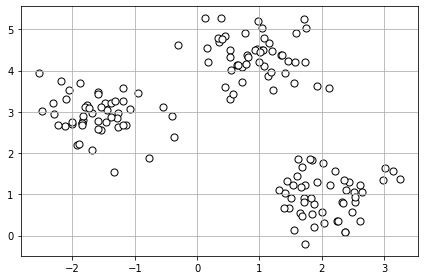

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

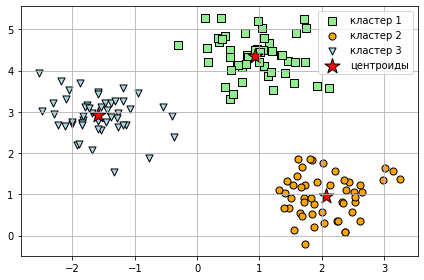

In [6]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='кластер 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='кластер 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='кластер 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black',
            label='центроиды')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
print('Искажение: %.2f' % km.inertia_)

Искажение: 72.48


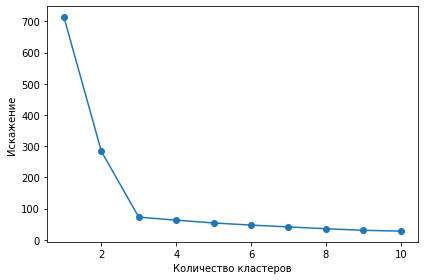

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.tight_layout()
plt.show()

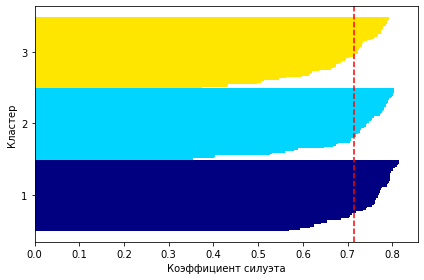

In [10]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

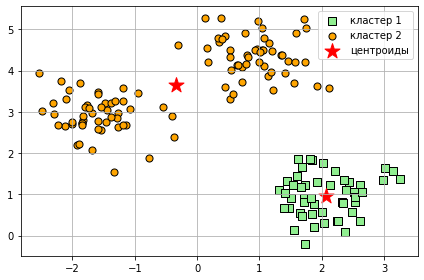

In [13]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='кластер 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='кластер 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='центроиды')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

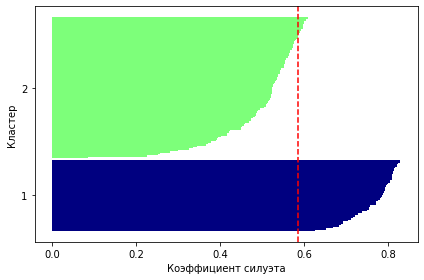

In [14]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Коэффициент силуэта')
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['Х', 'У', 'Z']
labels = ['ID_O', 'ID_l', 'ID 2', 'ID_З', 'ID 4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,Х,У,Z
ID_O,6.964692,2.861393,2.268515
ID_l,5.513148,7.194690,4.231065
ID 2,9.807642,6.848297,4.809319
ID_З,3.921175,3.431780,7.290497
ID 4,4.385722,0.596779,3.980443


In [16]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_O,ID_l,ID 2,ID_З,ID 4
ID_O,0.000000,4.973534,5.516653,5.899885,3.835396
ID_l,4.973534,0.000000,4.347073,5.104311,6.698233
ID 2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_З,5.899885,5.104311,7.244262,0.000000,4.382864
ID 4,3.835396,6.698233,8.316594,4.382864,0.000000


In [17]:
from scipy.cluster.hierarchy import linkage

help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [18]:
row_clusters = linkage(row_dist, method='complete', metric='euclidean')

/tmp/ipykernel_4844/3469143239.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


In [20]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [21]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [22]:
pd.DataFrame(row_clusters,
             columns=['Метка строки 1', 'Метка строки 2', 'Расстояние', 'К-во элементов в кластере'],
             index=['Кластер %d' % (i + 1) for i in range(row_clusters.shape[0])])

,Метка строки 1,Метка строки 2,Расстояние,К-во элементов в кластере
Кластер 1,0.0,4.0,3.835396,2.0
Кластер 2,1.0,2.0,4.347073,2.0
Кластер 3,3.0,5.0,5.899885,3.0
Кластер 4,6.0,7.0,8.316594,5.0


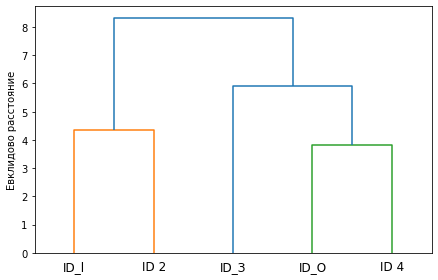

In [23]:
from scipy.cluster.hierarchy import dendrogram

# сделать дендрограмму в черном цвете (часть 1 из 2)
# from scipy.cluster.hierarchy import set_link_color__palette
# set_link_color__palette(['Ьlack'])
row_dendr = dendrogram(row_clusters, labels=labels,
                       # сделать дендрограмму в черном цвете (часть 2 из 2)
                       # color_threshold=np. inf
                       )
plt.tight_layout()
plt.ylabel('Евклидово расстояние')
plt.show()

/tmp/ipykernel_4844/2782467387.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/tmp/ipykernel_4844/2782467387.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


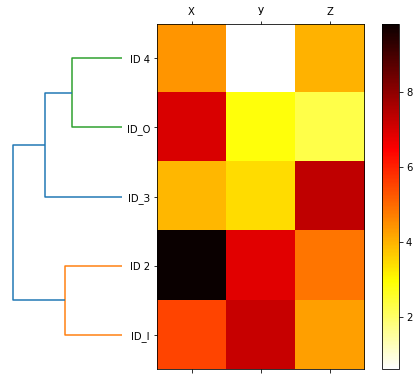

In [37]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
сах = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(сах)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Метки кластеров: %s' % labels)

Метки кластеров: [1 0 0 2 1]


In [39]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Метки кластеров: %s' % labels)

Метки кластеров: [0 1 1 0 0]


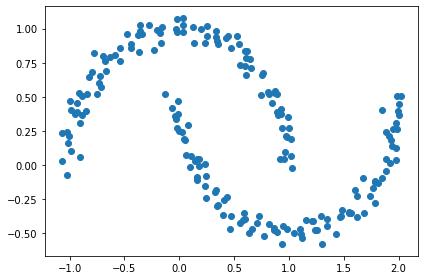

In [41]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

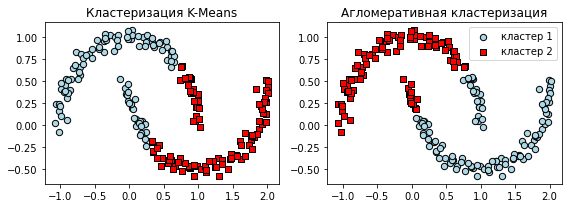

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='кластер 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label=' кластер 2')
ax1.set_title('Кластеризация K-Means')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='кластер 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='кластер 2')
ax2.set_title('Агломеративная кластеризация')
plt.legend()
plt.tight_layout()
plt.show()

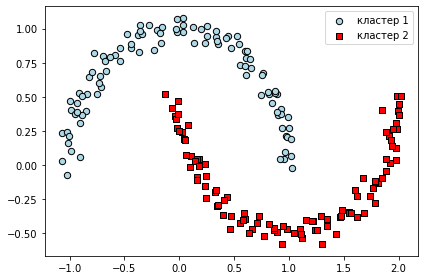

In [49]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='кластер 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', edgecolor = 'black', marker = 's', s=40, label='кластер 2')
plt.legend()
plt.tight_layout()
plt.show()